<a href="https://colab.research.google.com/github/Swayamprakashpatel/DETensorflow/blob/main/SKP_Public_Sharing_of_DEIP_Combination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DRUG EXCIPIENT INTERACTION PREDICTION BY ARTIFICIAL NEURAL NETWORK**

Accuracy of Training Data: 0.9834

Accuracy of Validating Data: 0.8839

Total Data: 1035

Developed by:
**Dr Swayamprakash Patel**

Asst. Professor

Ramanbhai Patel College of Pharmacy

Charotar University of Science and Technolgoy (CHARUSAT)

CONTACT: swayamprakash.patel@gmail.com 


 
**HOW TO USE**
 
Copy and paste PUBCHEM_CACTVS_SUBSKEYS>
 
Step: 1- Open any molecule in PubChem. (https://pubchem.ncbi.nlm.nih.gov/) by searching it. For example Aspirin
 
Step: 2 - Go to Download
 
Step: 3 - In 2D Structure - SDF click Display
 
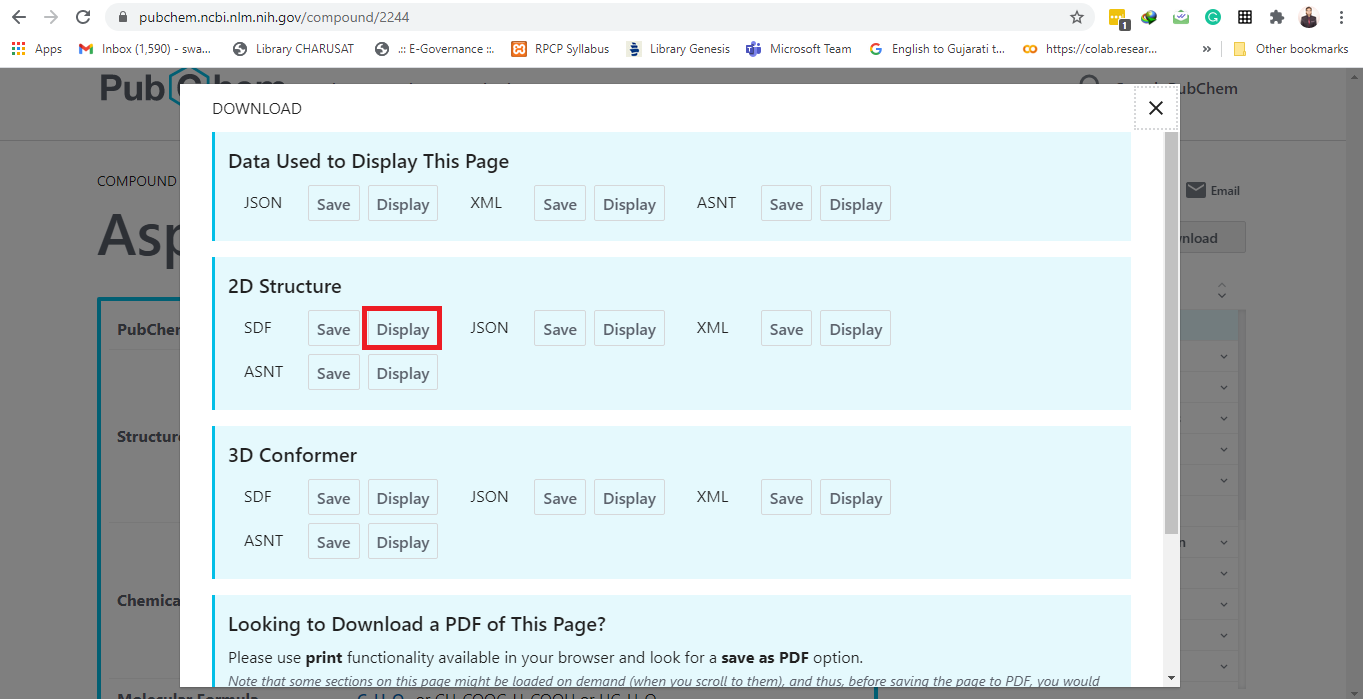
 
Step: 4 - Find Pubchem CACTVS SUBKEYS (Example: AAADccBwOAAAAAAAAAAAAAAAAAAAAAAAAAAwAAAAAAAAAAABAAAAGgAACAAADASAmAAyDoAABgCIAiDSCAACCAAkIAAIiAEGCMgMJzaENRqCe2Cl4BEIuYeIyCCOAAAAAAAIAAAAAAAAABAAAAAAAAAAAA)
 
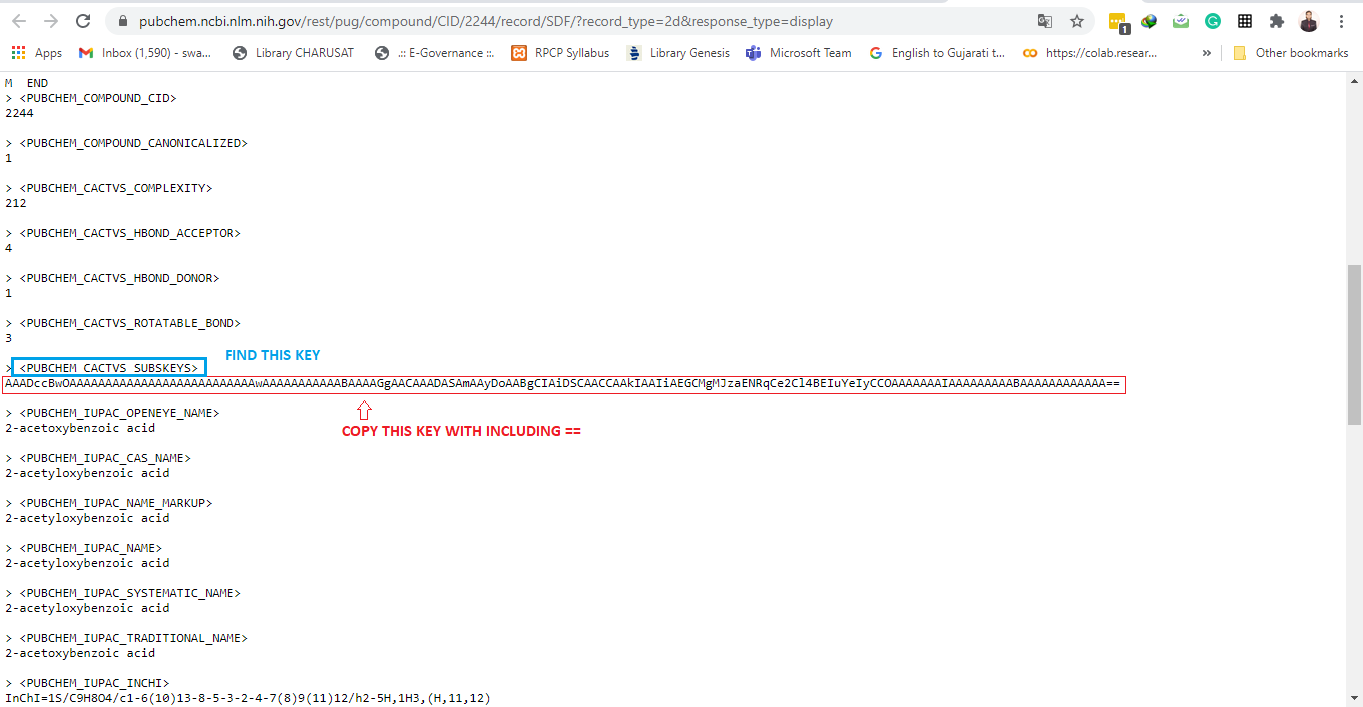
 
Step: 5 - Copy it and insert it in Drug and Excipient field
 
Step: 6 - Run code by just clicking play button. Wait to finish process.
 
Step: 7 - For getting final result just click play button of RESULT Section

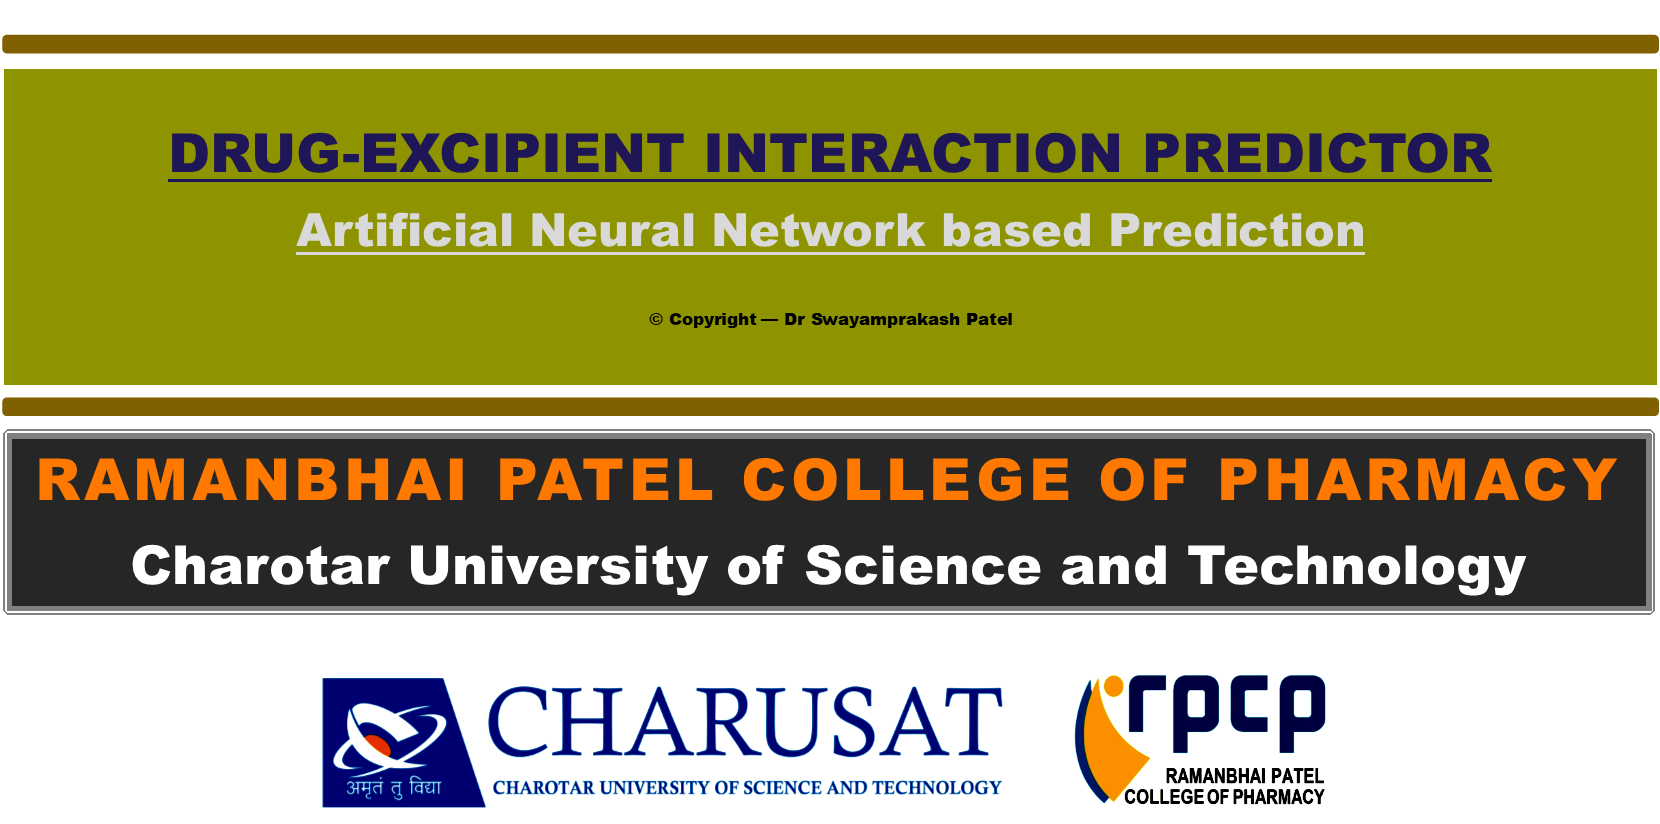

In [5]:
#@title Insert PubChem Fingerprint of Drug and Excipients and run code
%%capture
import tensorflow as tf
#import tensorflowjs as tfjs
import pandas as pd 
import numpy as np 
import io
#df = pd.read_csv('/content/drive/My Drive/DE.csv', low_memory=False,)
url = 'https://github.com/Swayamprakashpatel/DETensorflow/blob/main/DEL.csv?raw=true'
df = pd.read_csv(url, low_memory=False,) # Run for labeled data
 
#df.fillna('&',inplace=True)
df.drop('Drugs', axis = 1, inplace = True)
df.drop('Excipients', axis = 1, inplace = True)
print(df.shape)
df.head()
df.dtypes
df.columns[df.isna().any()].tolist()
dataset = df.values
X = dataset[:,0:1762]
#Y = dataset[:,1762:1763]
# Run this for labeled data
Y1 = dataset[:,1762:1763] 
#print(X, X.shape,X.dtype)
#print(Y, Y.shape, Y.dtype)
 
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(Y1)
OneHotEncoder(handle_unknown='ignore')
enc.categories_
Y = enc.transform(Y1).toarray()
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3,random_state = 42 )
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5, random_state= 42)
import numpy as np
 
X_train = np.asarray(X_train).astype(np.int64)
X_val = np.asarray(X_val).astype(np.int64)
X_test = np.asarray(X_test).astype(np.int64)
Y_train = np.asarray(Y_train).astype(np.int64)
Y_val = np.asarray(Y_val).astype(np.int64)
Y_test = np.asarray(Y_test).astype(np.int64)
 
filepath = '/content/drive/My Drive/DEModel.hdf5'
 
checkpoint = [tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', mode='max', save_best_only=True, Save_weights_only = False, verbose = 1), 
              tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=15, verbose =1)]
output_nodes = Y.shape[1]
print(output_nodes)
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1024, activation='relu', input_shape=(1762,)),
                             tf.keras.layers.Dense(1024, activation='relu'),
                             tf.keras.layers.Dense(1024, activation='relu'),
                             tf.keras.layers.Dense(output_nodes, activation= 'softmax')])
model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss=tf.keras.losses.BinaryCrossentropy(from_logits = False), metrics=['accuracy'])
hist = model.fit(X_train, Y_train, epochs= 200, callbacks=[checkpoint],validation_data=(X_val, Y_val), batch_size= 50)
model.evaluate(X_test, Y_test)
 
# Error Graph
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()
 
#@title Insert PubChem Fingerprint of Drug and Excipient
 
 
from base64 import b64decode
 
def PCFP_BitString(pcfp_base64) :
 
    pcfp_bitstring = "".join( ["{:08b}".format(x) for x in b64decode( pcfp_base64 )] )[32:913]
    return pcfp_bitstring
 
# *****copy paste PUBCHEM_CACTVS_SUBSKEYS*********
# DRUG#
#Chem1 = 'AAADccBwOAAAAAAAAAAAAAAAAAAAAAAAAAAwAAAAAAAAAAABAAAAGgAACAAADASAmAAyDoAABgCIAiDSCAACCAAkIAAIiAEGCMgMJzaENRqCe2Cl4BEIuYeIyCCOAAAAAAAIAAAAAAAAABAAAAAAAAAAAA=='
 
#EXCIPIENT#
#Chem2 = 'AAADceBwPAAAAAAAAAAAAAAAAAAAAAAAAAAkSAAAAAAAAAAAAAAAGgAACAAACBSwgAMACAAABgAAAAAAAAAAAAAAAAAAAAAAAAAREAIAAAAiQAAFAAAHAAHAYAwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA=='
 
#**************************************************
 
# Do not edit below codes
Pubchem_Fingerprint_of_Drug = "AAADceBzgAAAAAAAAAAAAAAAAAAAAWLAAAAwAAAAAAAAAFgB/AAAHAAYAAAADAjBHgQ/0PfJkACiAzRnZACSgCsxgqAd2aA4ZJiIKOLAmZGEIAhokALIyAcQgMAOiAACAAACAAAQAAQAAAQAAQAAAAAAAA==" #@param {type:"string"}
Pubchem_Fingerprint_of_Excipient_1 = "AAADccBwOAAAAAAAAAAAAAAAAAAAAAAAAAAwAAAAAAAAAAABAAAAGgAACAAADASAmAAyDoAABgCIAiDSCAACCAAkIAAIiAEGCMgMJzaENRqCe2Cl4BEIuYeIyCCOAAAAAAAIAAAAAAAAABAABBBAAAAAAA==" #@param {type:"string"}
Pubchem_Fingerprint_of_Excipient_2 = "AAADccBwOAAAAAAAAAAAAAAAAAAAAAAAAAAwAAAAAAAAAAABAAAAGgAACAAADASAmAAyDoAABgCIAiDSCAACCAAkIAAIiAEGCMgMJzaENRqCe2Cl4BEIuYeIyCCOAAAAAAAIAAAAAAAAABAABBBAAAAAAA==" #@param {type:"string"}
Pubchem_Fingerprint_of_Excipient_3 = "AAADccBwOAAAAAAAAAAAAAAAAAAAAAAAAAAwAAAAAAAAAAABAAAAGgAACAAADASAmAAyDoAABgCIAiDSCAACCAAkIAAIiAEGCMgMJzaENRqCe2Cl4BEIuYeIyCCOAAAAAAAIAAAAAAAAABAABBBAAAAAAA==" #@param {type:"string"}
Pubchem_Fingerprint_of_Excipient_4 = "AAADccBwOAAAAAAAAAAAAAAAAAAAAAAAAAAwAAAAAAAAAAABAAAAGgAACAAADASAmAAyDoAABgCIAiDSCAACCAAkIAAIiAEGCMgMJzaENRqCe2Cl4BEIuYeIyCCOAAAAAAAIAAAAAAAAABAABBBAAAAAAA==" #@param {type:"string"}

print(PCFP_BitString(Pubchem_Fingerprint_of_Drug))
print(PCFP_BitString(Pubchem_Fingerprint_of_Excipient_1))
print(PCFP_BitString(Pubchem_Fingerprint_of_Excipient_2))
print(PCFP_BitString(Pubchem_Fingerprint_of_Excipient_3))
print(PCFP_BitString(Pubchem_Fingerprint_of_Excipient_4))

dfDrug = (PCFP_BitString(Pubchem_Fingerprint_of_Drug))
dfExp1 = (PCFP_BitString(Pubchem_Fingerprint_of_Excipient_1))
dfExp2 = (PCFP_BitString(Pubchem_Fingerprint_of_Excipient_2))
dfExp3 = (PCFP_BitString(Pubchem_Fingerprint_of_Excipient_3))
dfExp4 = (PCFP_BitString(Pubchem_Fingerprint_of_Excipient_4))

Drug = list(dfDrug)
Excipient1 = list(dfExp1)
Excipient2 = list(dfExp2)
Excipient3 = list(dfExp3)
Excipient4 = list(dfExp4)


Comb1 = Drug + Excipient1
Comb2 = Drug + Excipient2
Comb3 = Drug + Excipient3
Comb4 = Drug + Excipient4


import pandas as pd
P1 = pd.DataFrame(np.array(Comb1).reshape(-1,len(Comb1)))
P2 = pd.DataFrame(np.array(Comb2).reshape(-1,len(Comb2)))
P3 = pd.DataFrame(np.array(Comb3).reshape(-1,len(Comb3)))
P4 = pd.DataFrame(np.array(Comb4).reshape(-1,len(Comb4)))


 
#@title RUN FOR PREDICTION
 
 
dataset1 = P1.values
dataset2 = P2.values
dataset3 = P3.values
dataset4 = P4.values



P1.dtype = int
P2.dtype = int
P3.dtype = int
P4.dtype = int

X_Predict1 = (dataset1[:,0:1762].astype(int))
X_Predict2 = (dataset2[:,0:1762].astype(int))
X_Predict3 = (dataset3[:,0:1762].astype(int))
X_Predict4 = (dataset4[:,0:1762].astype(int))
print(X_Predict1, X_Predict2, X_Predict3, X_Predict4)
print(X_Predict1.shape, X_Predict2.shape, X_Predict3.shape, X_Predict4.shape)
print(X_Predict1.dtype, X_Predict2.dtype, X_Predict3.dtype, X_Predict4.dtype)
 
Result1 = model.predict(X_Predict1)
Result2 = model.predict(X_Predict2)
Result3 = model.predict(X_Predict3)
Result4 = model.predict(X_Predict4)

print(Result1, Result2, Result3, Result4)
 
Final_Result1 = np.round(model.predict(X_Predict1))
Final_Result2 = np.round(model.predict(X_Predict2))
Final_Result3 = np.round(model.predict(X_Predict3))
Final_Result4 = np.round(model.predict(X_Predict4))

print(Final_Result1, Final_Result2, Final_Result3, Final_Result4)
 
Y_prediction1 = enc.inverse_transform(Final_Result1)
Y_prediction2 = enc.inverse_transform(Final_Result2)
Y_prediction3 = enc.inverse_transform(Final_Result3)
Y_prediction4 = enc.inverse_transform(Final_Result4)


print((Y_prediction1, Y_prediction1.shape),(Y_prediction2, Y_prediction2.shape),(Y_prediction3, Y_prediction3.shape),(Y_prediction4, Y_prediction4.shape))

In [9]:
#@title SHOW RESULT (Run this code after above code executed)
print("Combination1 is",Y_prediction1)
print("Combination2 is", Y_prediction2)
print("Combination3 is", Y_prediction3)
print("Combination4 is", Y_prediction4)


Combination1 is [['Compatible']]
Combination2 is [['Compatible']]
Combination3 is [['Compatible']]
Combination4 is [['Compatible']]
